Probelm Set 5: Generative Models

**Problem 2 : Derivation of the Variational Auto-Encoder Algorithm**


---




Let $X$ be the observation and $Z$ be the hidden variable. 

We want to find - 

the Posterior, $P\left( z|x \right)$ given as - 

$$P\left( z|x \right) = \frac{P\left(x|z\right) P(z)}{P(x)}$$
$$ = \frac{P\left(x,z\right)}{P(x)}$$

Computing the value of $P(x)$ is quite complicated because it is an integral of all the values $P\left(x|z\right) P(z)$ and in case of high dimensional features, i.e large dimenzional $z$, the computation of the integral becomes very computationally expensive. We can solve this problem using the Monte-Carlo Approach and another approach called Variational Inference.

**Variational Inference -** 

Let's approximate $P\left(z|x\right)$ using another distribution - $q(z)$. If we choose $q$ to be a tractable distribution (Gaussian, exponential, etc), we can tune the parameters of the distribution in a way that the $q$ becomes close to the original distribution. 

In order to make distribution $q$ similar to distribution $P$, the idea of KL-divergence can be helpful. KL-divergence provides information about the similarity/dissimlarity between two distributions and is unsymmetric in nature. 

If we minimize the KL-divergence, we can make $q$ similar to $p$.

$$\therefore KL\left(q(z)||P(z|x)\right) = - \sum q\left(z\right) log \frac{P(z|x)}{q(z)}$$ 
$$ = - \sum q(z) log \frac{\frac{P(x,z)}{P(x)}}{q(z)}$$
$$ = - \sum q(z) log \frac{P(x,z)}{q(z)} .\frac {1}{P(x)}$$
$$ = - \sum q(z) \left[log \frac{P(x,z)}{q(z)} - log P(x)\right]$$
$$ = - \sum q(z) log \frac{P(x,z)}{q(z)} + \sum_{z} q(z) log P(x)$$
$$ = - \sum q(z) log \frac{P(x,z)}{q(z)} + log P(x) \sum_{z} q(z)$$
$$ = - \sum q(z) log \frac{P(x,z)}{q(z)} + log P(x)$$, as $\sum_{z} q(z) = 1$
<br>
<br>

$$log P(x) = KL\left(q(z) || P(z|x)\right) + \sum q(z) log\frac{ P\left(x,z\right)}{q(z)}$$

Let the second term on RHS be $L$. Now, $log P(x)$ is a constant and we want to minimize the KL divergence. 
$$\therefore constant = KL-divergence + L$$

Thus, to maintain the constant, we can maximize $L$ to maximize the $KL-divergence$. 

$L$ is called $variational-lower bound$ and $L <= P(x)$. 

So, lower bound is - 

$$\sum q(z) log \frac{P(x,z)}{q(z)}$$
$$ = \sum q(z) log \frac{P(x|z) P(z)}{q(z)}$$
$$ = \sum q(z) \left[log P(x|z) + \frac{P(z)}{q(z)}\right]$$
$$ = \sum q(z) log P(x|z) \sum q(z) log\frac{P(z)}{q(z)}$$

The second sum quantity is negative KL-divergence between $q(z)$ and $P(z)$, the first term is the Expectation of $log P(x|z)$ w.r.t $q(z)$.

So, we have the objective function as, 

$$ = E_{q(z)} log P(x|z) - KL \left( q(z) || P(z) \right)$$ 

$................(1)$

Now, we will try to design an Auto-Encoder using the lower bound (2nd term) in the above equation. 

Let us assume $q$ is a Neural Network, a function that maps $x$ to $z$, i.e. takes input $x$ and maps it to $z$. Then, we assume that $P$ is another neural network that takes input $z$ and maps it to $x^{'}$. In other words we have - 


$$ x \rightarrow NN \left(q(z|x)\right) \rightarrow z \rightarrow NN \left(p(x|z)\right) \rightarrow x^{'} $$

This is our $Auto-Encoder$.

Let's assume that $z$ has a Gaussian distribution. We have an auto-encoder as a part of our objective function that tells us to make a distribution similar to another distribution that we need to choose, which we have chosen as a Gaussian distribution. 

The first part of our objective function is actually a construction error. 

Since the second NN is a deterministic model, the relationship between $z$ and $x^{'}$ will always remain the same. Thus, $P(x|z)$ can be written as $P(x|x^{'})$ . Since the distribution is Gaussian, then it is of the form, 

$$P(x|x^{'}) = e^{-\left|x-x^{'}\right|^{2}}$$

Takin log, we get
$$\left|x-x^{'}\right|^2$$

So, now we have a auto-encoder, with a cost function to minimze the distance between we observe as -

$$min  \left|x-x^{'}\right|^{2} + KL\left( q(z|x) || N(    )\right)$$, where $N(    )$ can be any known distribution, Gaussian in this case.

But, we have a Graphical model, and all we have are random variables. So, things are not necessarily deterministic. We need to design our network in such a way that it doesn't generate the code of $z$ rather generates the parameter of the distribution that generates the code. 

So,$z$ has a Normal distribution with 2 parameters -  $\mu$ and $\sigma$. $\mu$ is a D-dimensional vector and $\sigma$ is DxD, consider a diagonal matrix for simplicity. 

We force or train the network to generate the mean of this distribution and the variance of this distribution. We sample the distribution and pass it to the second Neural Network and generate $x^{'}$. 

We can use this model as a $Generative$ $Model$. After the training is done, we get $z$ with a $\mu$ and $\sigma$. We sample from $z$ and feed it to the second neural network. 

**Thus, we get all input observations mapped in a hidde space with certain distribution, and we are now sampling from that distribution to a decoder.** 

Eventually, we are going to get points similar to what we have observed. This is our $Variational$ $Auto-Encoder$.

Let us explore the implementation of Variational Auto-Encoders. 

**Code for Variational Auto-Encoder Algorithm**


---


Importing the Dependencies


In [ ]:
import keras
from keras.layers import Lambda, Input, Dense, Conv2D, Flatten, Reshape, Conv2DTranspose, Dropout
from keras.models import Model, Sequential
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K
from keras import layers
from scipy.stats import norm
import matplotlib.patches as mptaches
import pandas as pd

Using TensorFlow backend.


Getting the MNIST dataset and Normalizing  it

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_size = x_train.shape[1]
original_dim = img_size * img_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train= x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
input_shape = (original_dim, )
batch_size = 128

In [ ]:
def latent_sampling(args):
    z_mean_layer, z_log_var_layer = args
    batch = K.shape(z_mean_layer)[0]
    dimension = K.int_shape(z_mean_layer)[1]
    ep = K.random_normal(shape=(batch, dimension))
    return z_mean_layer + K.exp(0.5 * z_log_var_layer) * ep

Steps of Developing the encoder and decoder models for the VAE 

1. Design the Encoder Model 
2. Reparameterization for the encoder model
3. Instantiate encoder
4. Design the Decoder Model -
5. Instantiate decoder
6. Finally, instantiate the VAE model
7. Find Losses
- KL Loss 
- VAE Loss
8. Train the VAE
9. Display MNIST trained images

In [ ]:
def create_model(hidden_node, latent_node):
    # Design encoder model
    # input layer
    encoder_inputs = Input(shape=input_shape, name='input_encoder')
    # hidden layer
    encoder_hidden = Dense(hidden_node, activation='relu')(encoder_inputs)

    z_mean = Dense(latent_node, name='z_mean')(encoder_hidden)
    z_log_var = Dense(latent_node, name='z_log_var')(encoder_hidden)

    # normalize log variance to std dev
    z = Lambda(latent_sampling, output_shape=(latent_node,), name='z')([z_mean, z_log_var])

    # Instantiate encoder model
    encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
    encoder.summary()

    # Design decoder model
    latent_encoder_inputs = Input(shape=(latent_node,), name='latent_sampling')
    decoder_hidden = Dense(hidden_node, activation='relu')(latent_encoder_inputs)
    decoder_outputs = Dense(original_dim, activation='sigmoid')(decoder_hidden)

    # Instantiate decoder model
    decoder = Model(latent_encoder_inputs, decoder_outputs, name='decoder')
    decoder.summary()

    # Instantiate VAE model
    model_outputs = decoder(encoder(encoder_inputs)[2])
    vae = Model(encoder_inputs, model_outputs, name='vae_mlp')
    
    #Find KL and VAE loss
    reconstruction_loss = binary_crossentropy(encoder_inputs, model_outputs)
    reconstruction_loss *= original_dim
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = K.mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer='adam')
    return vae, encoder, decoder


Train the VAE

In [ ]:
def train_model(model):
    trained_model = model.fit(x_train, epochs=epochs,
                batch_size=batch_size,
                validation_data=(x_test, None))
    return trained_model 

Display the MNIST trained digits

In [ ]:
def plot_latent_space(encoder):
    z_test, _, _ = encoder.predict(x_test, batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_test[:, 0], z_test[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("Z[0]")
    plt.ylabel("Z[1]")
    plt.savefig("VAE")
    plt.show()

In [ ]:
def plot_vae_output(decoder,latent_dim):
    n = 20
    digit_num = 28
    figure = np.zeros((digit_num * n, digit_num * n))
    axis_x = np.linspace(-3, 3, n)
    axis_y = np.linspace(-3, 3, n)[::-1]    
    for i, yi in enumerate(axis_y):
        for j, xi in enumerate(axis_x):
            if(latent_dim == 2):
                latent_sample = np.array([[xi, yi]*int(latent_dim/2)])
            else:
                latent_sample = np.random.normal(0,1,size=[batch_size, latent_dim])
            input_decoded = decoder.predict(latent_sample)
            digit = input_decoded[0].reshape(digit_num, digit_num)
            figure[i * digit_num: (i + 1) * digit_num,
                   j * digit_num: (j + 1) * digit_num] = digit
    
    plt.figure(figsize=(10, 10))
    i_range = digit_num // 2
    j_range = (n - 1) * digit_num + i_range + 1
    pixel_range = np.arange(i_range, j_range, digit_num)
    sample_range_x = np.round(axis_x, 1)
    sample_range_y = np.round(axis_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.imshow(figure, cmap='Greens_r')
    plt.savefig("VAE_Output")
    plt.show()

Create VAE model with 2 code units and generating images by varying each code unit from -3 to 3

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_encoder (InputLayer)      (None, 784)          0                                            
__________________________________________________________________________________________________
dense_29 (Dense)                (None, 256)          200960      input_encoder[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            514         dense_29[0][0]                   
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            514         dense_29[0][0]                   
____________________________________________________________________________________________

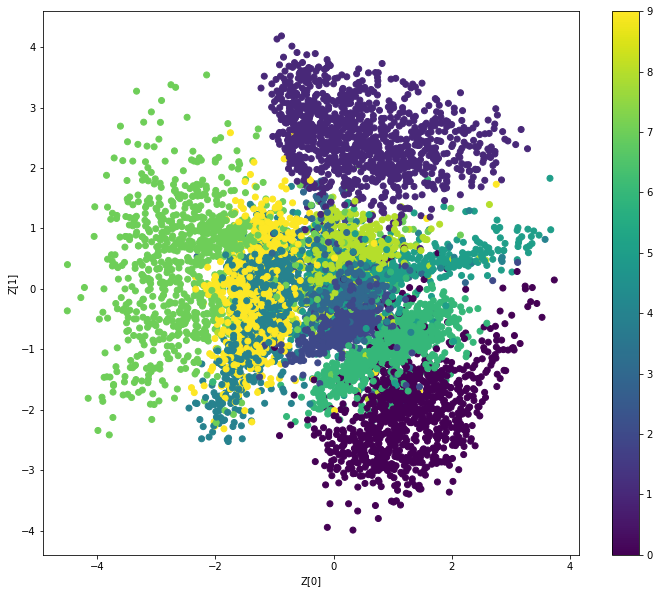

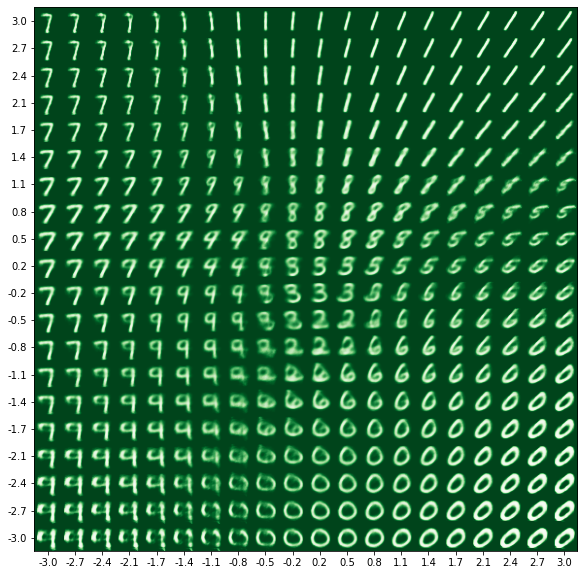

In [ ]:
intermediate_dim = 256
latent_dim = 2
epochs = 50
vae, encoder, decoder = create_model(intermediate_dim, latent_dim)
trained_model = train_model(vae)
plot_latent_space(encoder)
plot_vae_output(decoder, latent_dim)

Create VAE model with 8 code units

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_encoder (InputLayer)      (None, 784)          0                                            
__________________________________________________________________________________________________
dense_32 (Dense)                (None, 256)          200960      input_encoder[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 8)            2056        dense_32[0][0]                   
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 8)            2056        dense_32[0][0]                   
____________________________________________________________________________________________

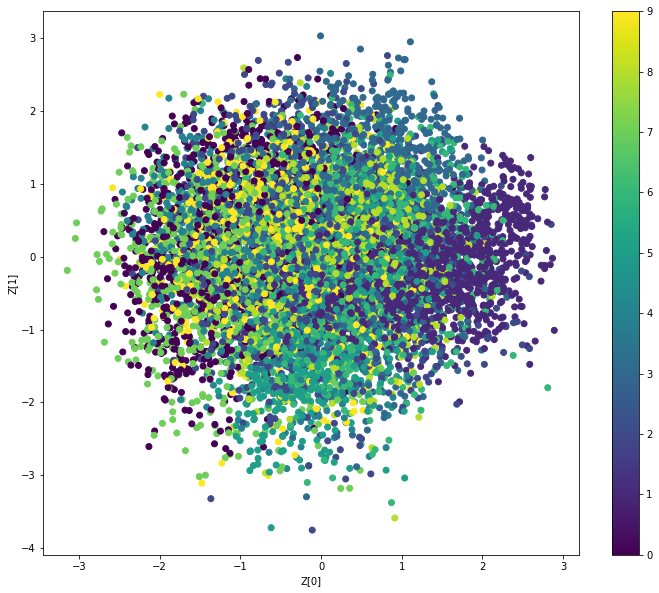

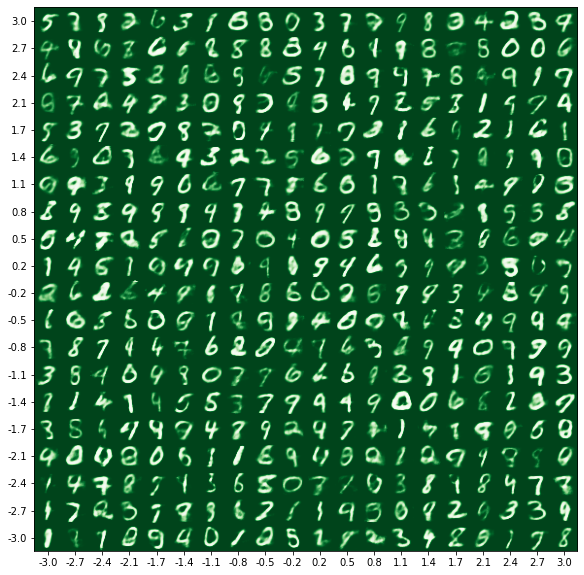

In [ ]:
intermediate_dim = 256
latent_dim = 8
epochs = 50
vae, encoder, decoder = create_model(intermediate_dim, latent_dim)
trained_model = train_model(vae)
plot_latent_space(encoder)
plot_vae_output(decoder, latent_dim)

Create VAE model with 16 code units

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_encoder (InputLayer)      (None, 784)          0                                            
__________________________________________________________________________________________________
dense_35 (Dense)                (None, 256)          200960      input_encoder[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 16)           4112        dense_35[0][0]                   
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 16)           4112        dense_35[0][0]                   
____________________________________________________________________________________________

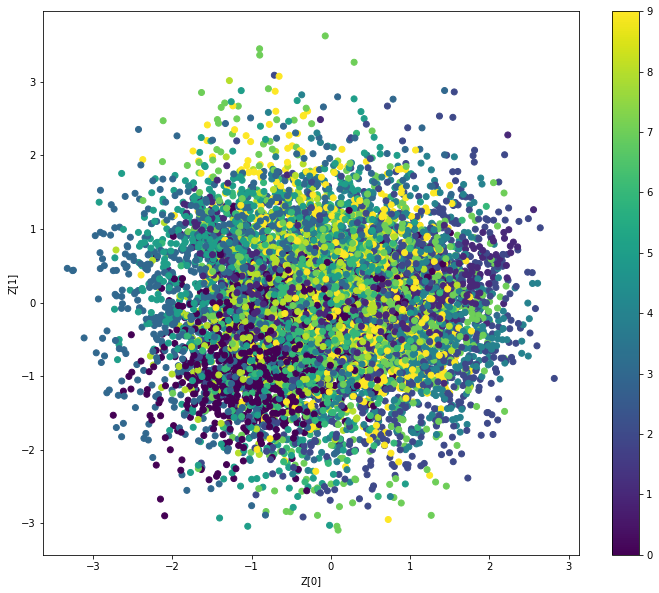

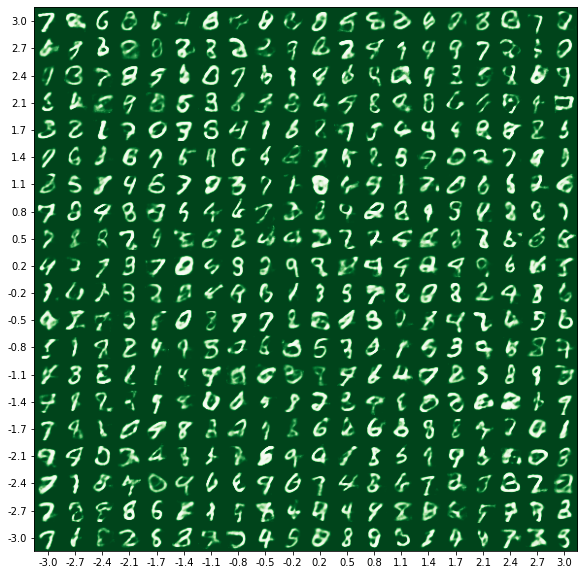

In [ ]:
intermediate_dim = 256
latent_dim = 16
epochs = 50
vae, encoder, decoder = create_model(intermediate_dim, latent_dim)
trained_model = train_model(vae)
plot_latent_space(encoder)
plot_vae_output(decoder, latent_dim)